In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import matplotlib.cm

In [24]:
oecd_bli=pd.read_csv('BLI_05062024190747550.csv')
oecd_bli=oecd_bli[oecd_bli['Inequality']=='Total']
dataframe=pd.DataFrame(oecd_bli,columns=['Country','Indicator','Value'])
lifeindicator=dataframe[dataframe['Indicator']=='Life satisfaction']

In [25]:
gdp=pd.read_excel('WITS-Country-Timeseries.xlsx',sheet_name='Country-Timeseries',dtype=str)
gdp=pd.DataFrame(gdp,columns=['Country Name','2021'])

In [4]:
country_stats=lifeindicator.merge(gdp,how='outer',left_on='Country',right_on='Country Name')
country_stats=country_stats.dropna()

In [5]:
country_stats=country_stats.sort_values(by='Value',ascending=False)
country_stats=country_stats.drop(columns=['Country Name','Indicator'])
country_stats=country_stats.rename(columns={'2021':'GDP','Value':'LifeExpectancy Index'})
country_stats.head(50)

,Country,LifeExpectancy Index,GDP
6,Finland,7.9,53489.7520190898
11,Iceland,7.6,68594.0081044426
26,Switzerland,7.5,91991.6004583563
5,Denmark,7.5,68007.7566732954
18,Netherlands,7.5,57708.1112134322
16,Luxembourg,7.4,133590.146975586
20,Norway,7.3,90655.3910229392
25,Sweden,7.3,61143.2212428047
8,Germany,7.3,51203.5544731043
19,New Zealand,7.3,49996.4206725811


In [6]:
country_stats['GDP'] = country_stats['GDP'].map(lambda x: float(x))

In [7]:
country_stats.round({'GDP':0})

,Country,LifeExpectancy Index,GDP
6,Finland,7.9,53490.0
11,Iceland,7.6,68594.0
26,Switzerland,7.5,91992.0
5,Denmark,7.5,68008.0
18,Netherlands,7.5,57708.0
16,Luxembourg,7.4,133590.0
20,Norway,7.3,90655.0
25,Sweden,7.3,61143.0
8,Germany,7.3,51204.0
19,New Zealand,7.3,49996.0


In [8]:
X=np.c_[country_stats['GDP']]
Y=np.c_[country_stats['LifeExpectancy Index']]

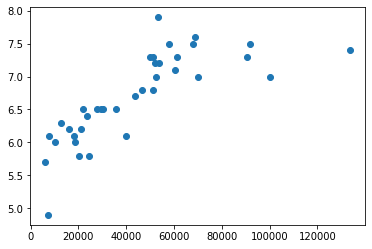

In [27]:
x_axis=country_stats['GDP']
y_axis=country_stats['LifeExpectancy Index']
plt.scatter(x_axis,y_axis)
plt.show()

In [28]:
import sklearn.linear_model


model=sklearn.linear_model.LinearRegression()

In [29]:
model.fit(X,Y)

LinearRegression()

In [30]:
X_new=[[40000]]
print(model.predict(X_new))

[[6.61806197]]
